<a href="https://colab.research.google.com/github/Pratham-04/CS786A-Spring-2020-21/blob/main/Project/Experiment_Checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selecting rewards for the game on the criteria, that
1. Each arm is the best at least once
2. Number of best-arm flips in the chosen set is the same as the average in that condition
There are 4 conditions (stable, variable) X (trend, no trend)
Trend is a constant drift in the rewards. Stable and variable implies low and high volatility.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def makeRew(trend, stable, clip, numTrials, s):
    np.random.seed(s)
    
    mus = []
    rews = []
    mu = np.array([-60, -20, 20, 60])
    np.random.shuffle(mu)
    mus.append(mu)
    sigma1 = 4
    decay = 0.9836
    
    kappas = np.zeros(4)
    if trend == 1:
        kappas[mu > 0] = -0.5
        kappas[mu < 0] = 0.5
                
    sigma2 = 4        
    rews.append(np.random.normal(mu, sigma2))           
    for i in range(1, numTrials):
        if stable == 0 and (51<=i<=100 or 151<=i<=200):
            sigma2 = 16
        else:
            sigma2 = 4
        mu = np.multiply(mu, decay)
        mu = np.add(mu, kappas)
        mu = np.random.normal(mu, sigma2)
        if clip == 1:
            mu = np.clip(mu, -100, 100)
        mus.append(mu)
        
        rew = np.random.normal(mu, sigma1)
        if clip == 1:
            rew = np.clip(rew, -100, 100)
        rews.append(rew)
    
    # This part was removed for the next cell to calculate average values
    return np.array(mus), np.array(rews)
#     return np.array(mus), np.array(rews)
            

def countChange(rews):
    maxs = np.argmax(rews, 1)
    change = np.where(maxs[:-1] != maxs[1:])[0]
    return len(change)

In [ ]:
# Unstable, No trend - 21 flips - seed 207, 368
# Unstable, Trend - 22 flips - seed 49, 67
# Stable, No trend - 27 flips - seed 82, 411
# Stable, Trend - 24 flips - seed 75, 287

trend = 1
stable = 0
clip = 0
s = 67
numTrials = 100
mus, rews = makeRew(trend, stable, clip, numTrials, s);
print(rews)

[[ 2.05388392e+01 -5.79901868e+01 -1.82595048e+01  6.20370957e+01]
 [ 1.62110212e+01 -6.13695336e+01 -1.46497934e+01  6.25146880e+01]
 [ 2.49083442e+01 -6.37282141e+01 -2.57860374e+01  6.28202799e+01]
 [ 1.23835149e+01 -5.24820180e+01 -2.19076617e+01  6.02289679e+01]
 [ 2.82283113e+00 -4.63939439e+01 -1.36768061e+01  4.60559020e+01]
 [-1.61606778e+00 -4.43437712e+01 -9.27853569e+00  4.85924870e+01]
 [ 2.24323204e+00 -5.55474183e+01 -5.34723784e+00  4.89268965e+01]
 [-5.58090307e+00 -4.91719502e+01 -7.61854785e-01  4.63792596e+01]
 [-8.84738242e+00 -5.71578821e+01 -2.45571445e+00  3.83375741e+01]
 [-3.17380049e+00 -5.42089853e+01  7.67517005e+00  3.24492294e+01]
 [-2.54876106e+00 -5.62892655e+01 -1.21682470e+01  3.70228708e+01]
 [-4.55627941e+00 -5.38433625e+01 -9.35800408e+00  3.65548826e+01]
 [-6.65470326e+00 -4.75660152e+01  1.54310639e+01  3.92918418e+01]
 [-1.26391579e+01 -4.08566028e+01  9.67131540e+00  4.47020484e+01]
 [ 1.22444871e-01 -4.72849653e+01 -2.10015982e+00  3.50710317e

In [ ]:
numTrials = 200
s = None

trend = 0
stable = 0
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

trend = 0
stable = 1
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

trend = 1
stable = 0
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

trend = 1
stable = 1
clip = 0
print("For stable = " + str(stable) + ", trend = " + str(trend))
counts = []
for i in range(10000):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    counts.append(countChange(rews))
counts = np.array(counts)
print(np.mean(counts))
print(np.std(counts))

For stable = 0, trend = 0
21.922
9.689618981157102
For stable = 1, trend = 0
27.3177
12.449673357562437
For stable = 0, trend = 1
22.2719
9.483046471994113
For stable = 1, trend = 1
23.6821
11.355009449137416


114


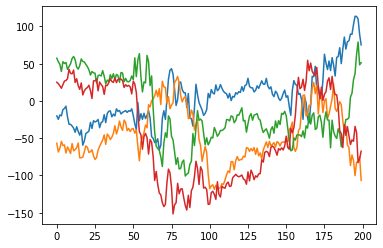

120


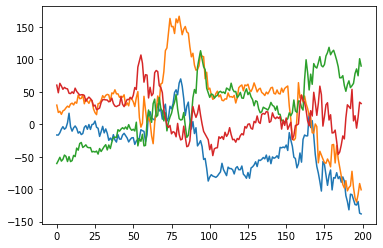

169


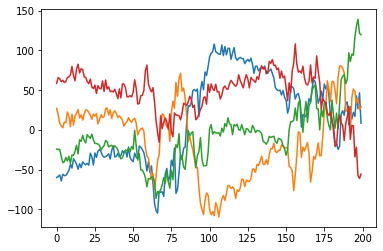

179


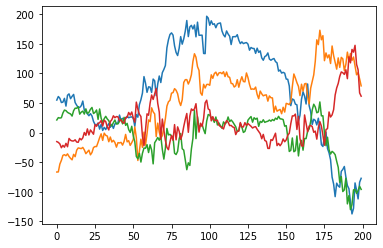

239


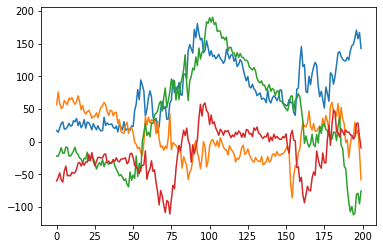

255


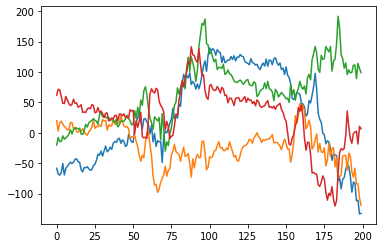

259


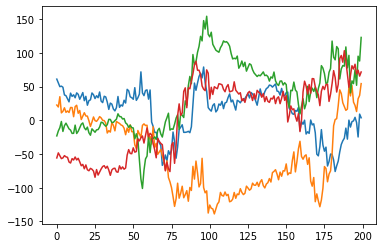

294


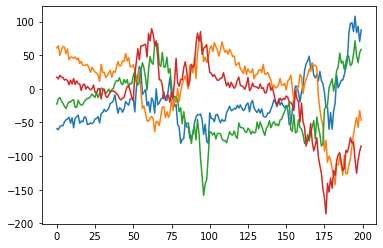

322


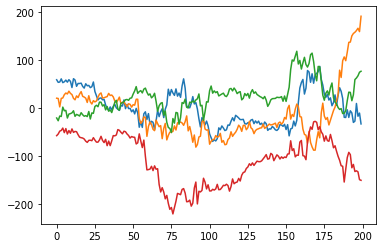

346


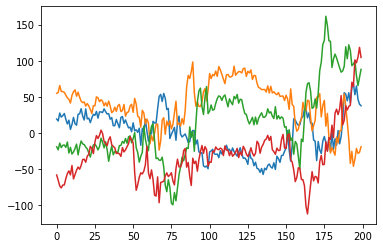

370


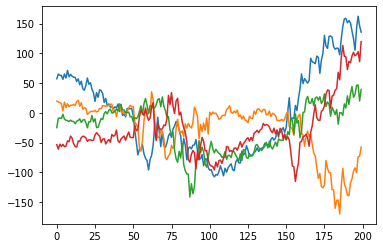

In [ ]:
stable = 0
trend = 0
clip = 0
numTrials = 200
for s in range(100,400):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 21:
        print(s)
        plt.plot(rews)
        plt.show()

38


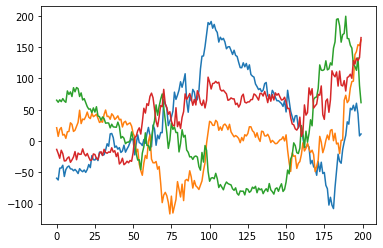

42


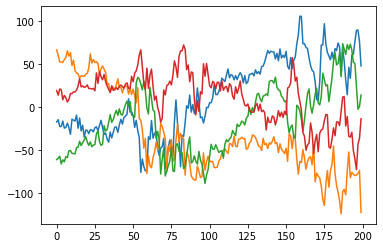

84


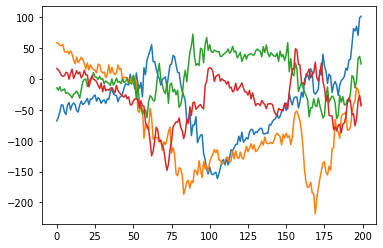

96


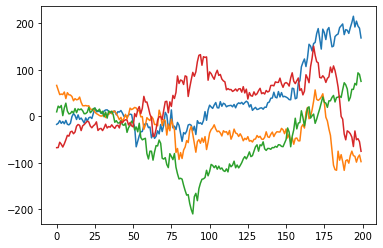

101


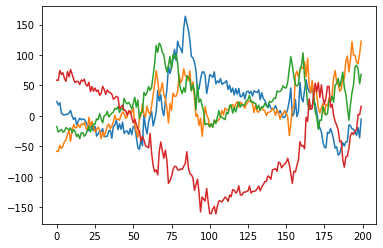

111


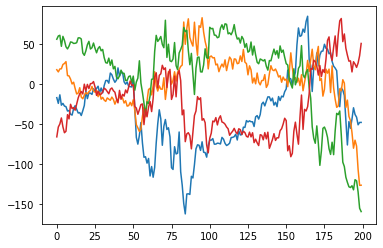

124


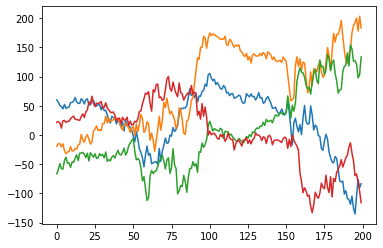

125


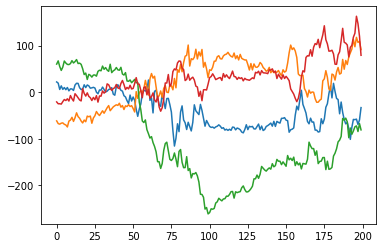

126


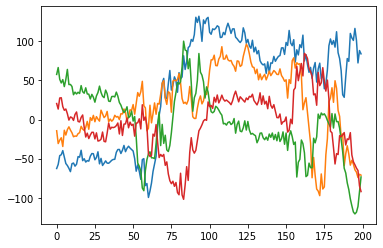

130


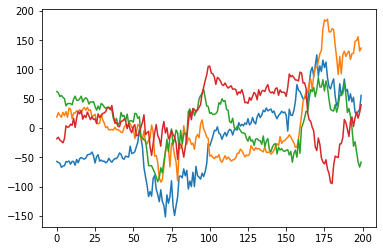

158


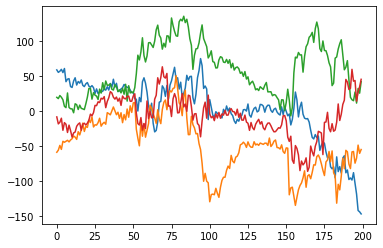

181


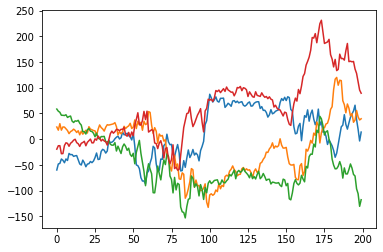

187


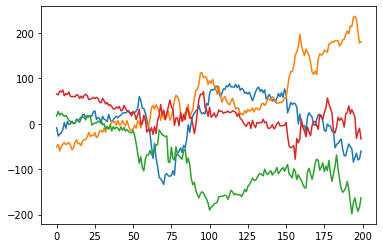

215


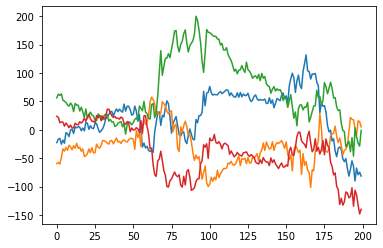

236


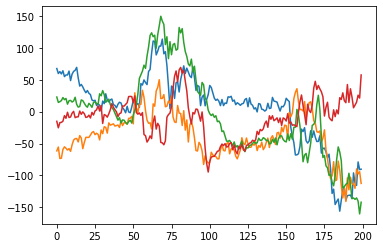

267


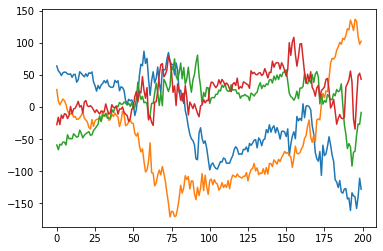

273


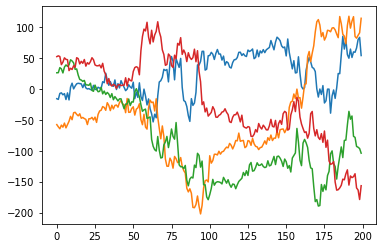

292


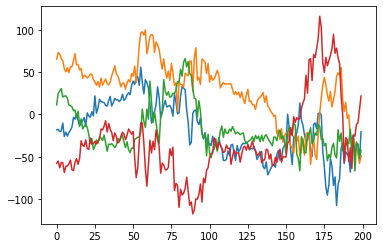

In [ ]:
stable = 0
trend = 1
clip = 0
numTrials = 200
for s in range(0,300):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 22:
        print(s)
        plt.plot(rews)
        plt.show()

65


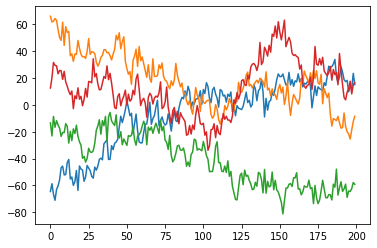

82


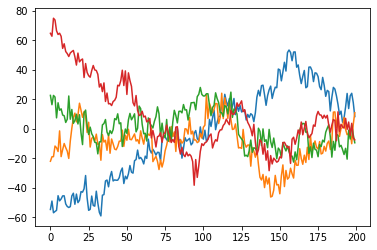

103


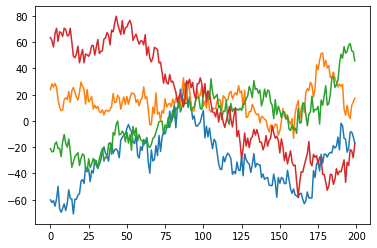

193


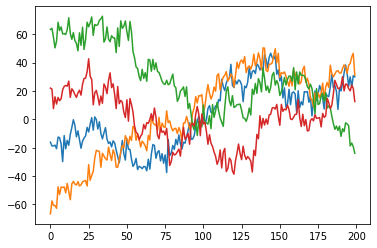

203


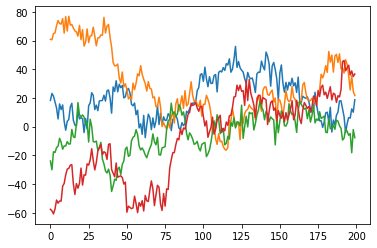

211


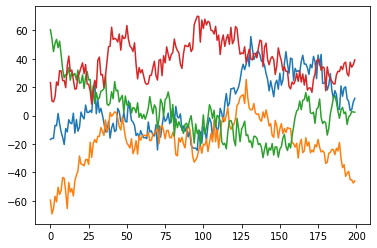

278


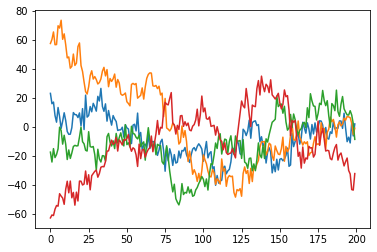

283


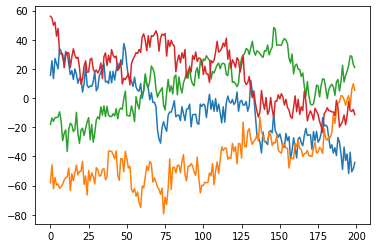

309


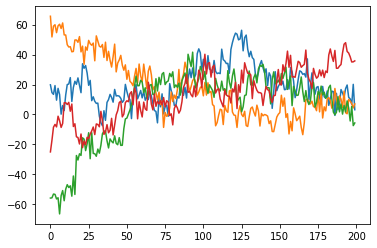

341


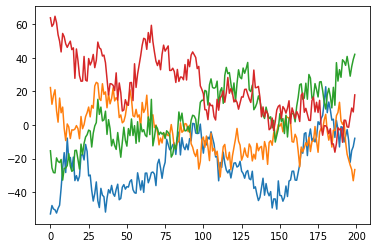

387


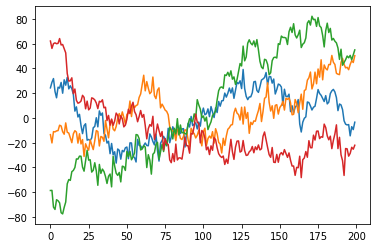

411


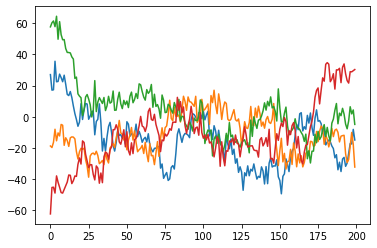

426


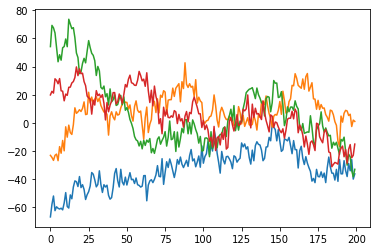

455


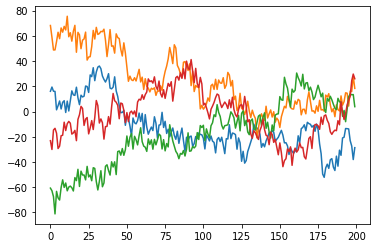

In [ ]:
stable = 1
trend = 0
clip = 0
numTrials = 200
for s in range(50,500):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 27:
        print(s)
        plt.plot(rews)
        plt.show()

32


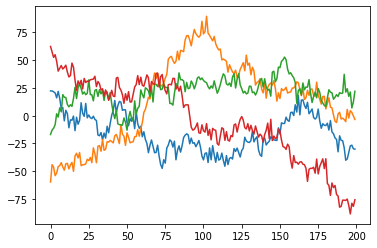

75


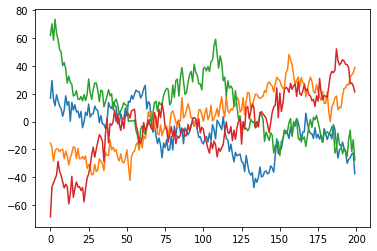

78


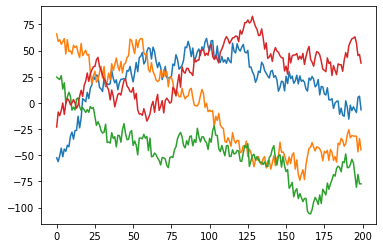

177


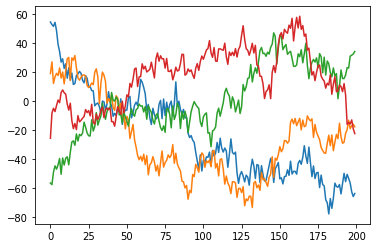

231


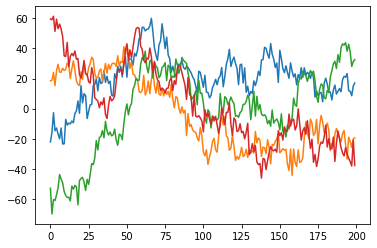

271


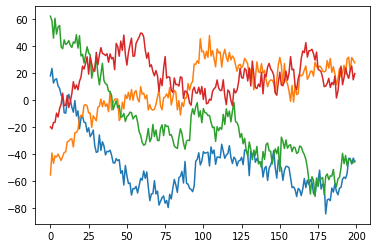

287


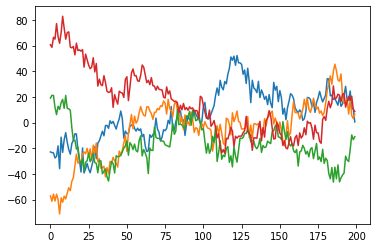

297


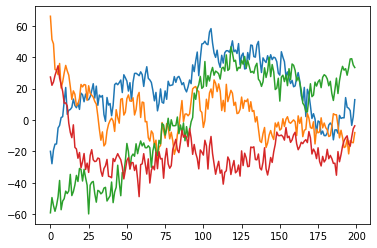

328


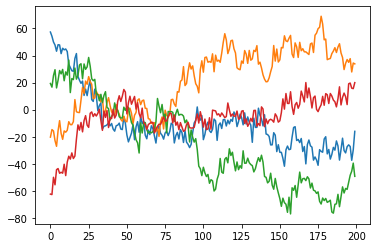

339


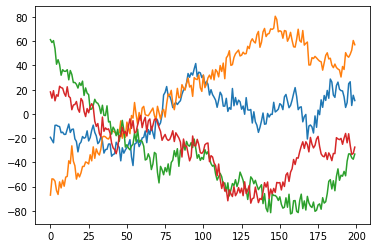

395


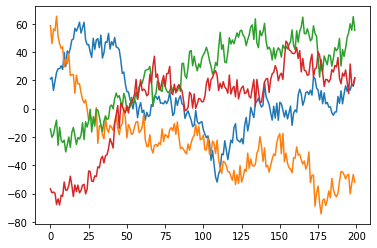

In [ ]:
stable = 1
trend = 1
clip = 0
numTrials = 200
for s in range(0,400):
    mus, rews = makeRew(trend, stable, clip, numTrials, s)
    #print(mus)
    if np.any(mus == None):
        continue
    elif countChange(rews) == 24:
        print(s)
        plt.plot(rews)
        plt.show()

Unstable, No trend - 21 flips - seed 207, 368<br>
Unstable, Trend - 22 flips - seed 49, 67<br>
Stable, No trend - 27 flips - seed 82, 411<br>
Stable, Trend - 24 flips - seed 75, 287<br>